In [204]:
import pandas as pd 
import glob
from sklearn.model_selection import train_test_split 
import plotly.graph_objs as go
import matplotlib as plt
import plotly as pl 
import numpy as np
import bokeh
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import *
from plotly.graph_objs import Scatter, Layout
from pandas.io.json import json_normalize
from fbprophet import Prophet

In [205]:
pl.tools.set_credentials_file(username='HerbertGourout', api_key='rCfamr0DHh0nnioBytM9')

In [206]:
path = r'data'
allfile =  glob.glob(path+'/*.json')
#df=pd.read_json(Allfile[0],orient='index')
allfile.sort()

In [207]:
import json

dfs=[]
for file in allfile:
    with open(file) as data_file:
        data = json.load(data_file)
        res = json_normalize(data)
       # print(res)
        dfs.append(res)
    
train_data = pd.concat(dfs,ignore_index=True)
train_data=train_data.drop(['closePrice.lastTraded','highPrice.lastTraded',
                            'lowPrice.lastTraded','openPrice.lastTraded'],axis=1)

### Les plots

In [208]:
df= train_data
trace1=go.Scatter(x=df.snapshotTime, y=df['openPrice.bid'], name="Open", line = dict(color = '#17BECF'), opacity = 0.8)
trace2=go.Scatter(x=df.snapshotTime, y=df['highPrice.bid'], name="HIGH", line=dict(color='#7F7F7F'), opacity=0.8)
trace3=go.Scatter(x=df.snapshotTime, y=df['closePrice.bid'], name="Close", line=dict(color='red'), opacity=0.8)
trace4=go.Scatter(x=df.snapshotTime, y=df['lowPrice.bid'], name="Low", line = dict(color = '#33CFA5'), opacity = 0.8)

### Add mean to graph

In [209]:
"""
trace_1_avg = go.Scatter(x=df.snapshotTime,
                            y=[df.Open.mean()]*len(df.snapshotTime),
                            name='Open Average',
                            visible=False,
                            line=dict(color='#17BECF', dash='dash'))

trace_2_avg = go.Scatter(x=df.snapshotTime,
                            y=[df.High.mean()]*len(df.snapshotTime),
                            name='High Average',
                            visible=False,
                            line=dict(color='#7F7F7F', dash='dash'))

trace_3_avg = go.Scatter(x=df.snapshotTime,
                            y=[df.Low.mean()]*len(df.snapshotTime),
                            name='Low Average',
                            visible=False,
                            line=dict(color='#red', dash='dash'))

trace_4_avg = go.Scatter(x=df.snapshotTime,
                            y=[df.Close.mean()]*len(df.snapshotTime),
                            name='Close Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))"""
data=[trace1,trace2,trace3,trace4]
#data1=[trace2,trace_2_avg,trace3,trace_3_avg]


### Annotation

In [210]:
"""
high_annotations=[dict(x='2018-03-01',
                       y=df.High.mean(),
                       xref='x', yref='y',
                       text='High Average:<br>'+str(df.High.mean()),
                       ax=0, ay=-40),
                  dict(x=df.High.idxmax(),
                       y=df.High.max(),
                       xref='x', yref='y',
                       text='High Max:<br>'+str(df.High.max()),
                       ax=0, ay=-40)]
low_annotations=[dict(x='2013-05-01',
                      y=df.Low.mean(),
                      xref='x', yref='y',
                      text='Low Average:<br>'+str(df.Low.mean()),
                      ax=0, ay=40),
                 dict(x=df.High.idxmin(),
                      y=df.Low.min(),
                      xref='x', yref='y',
                      text='Low Min:<br>'+str(df.Low.min()),
                      ax=0, ay=40)]""""""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-210-eb658fd0e6f9>, line 21)

### update menu

In [ ]:
"""updatemenus = list([
    dict(type="buttons",
         active=-1,
         buttons=list([   
            dict(label = 'High',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]},
                         {'title': 'Yahoo High',
                          'annotations': high_annotations}]),
            dict(label = 'Low',
                 method = 'update',
                 args = [{'visible': [False, False, True, True]},
                         {'title': 'Yahoo Low',
                          'annotations': low_annotations}]),
            dict(label = 'Both',
                 method = 'update',
                 args = [{'visible': [True, True, True, True]},
                         {'title': 'Yahoo',
                          'annotations': high_annotations+low_annotations}]),
            dict(label = 'Reset',
                 method = 'update',
                 args = [{'visible': [True, False, True, False]},
                         {'title': 'Yahoo',
                          'annotations': []}])
        ]),
    )
])""""""

### add axis

In [227]:
layout2 = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='snapshotTime'
    )
)
    
#layout = dict(title='Yahoo', showlegend=False updatemenus=updatemenus)

#fig = dict(data=data1, layout=layout)
fig2= dict(data=data,layout=layout2)
#pl.offline.plot(fig, filename = "Manually Set Range.html")
pl.offline.plot(fig2, filename = "update_button'")
pl.offline.plot(fig2,include_plotlyjs=False,output_type='div')


/home/seydou/.local/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `update_button'` didn't end with .html. Adding .html to the end of your file.



'<div id="43ce5f08-2fa3-478a-8462-a27a2225e634" style="height: 100%; width: 100%;" class="plotly-graph-div"></div><script type="text/javascript">window.PLOTLYENV=window.PLOTLYENV || {};window.PLOTLYENV.BASE_URL="https://plot.ly";Plotly.newPlot("43ce5f08-2fa3-478a-8462-a27a2225e634", [{"type": "scatter", "x": ["2018/03/12 09:00:00", "2018/03/12 09:01:00", "2018/03/12 09:02:00", "2018/03/12 09:03:00", "2018/03/12 09:04:00", "2018/03/12 09:05:00", "2018/03/12 09:06:00", "2018/03/12 09:07:00", "2018/03/12 09:08:00", "2018/03/12 09:09:00", "2018/03/12 09:10:00", "2018/03/12 09:11:00", "2018/03/12 09:12:00", "2018/03/12 09:13:00", "2018/03/12 09:14:00", "2018/03/12 09:15:00", "2018/03/12 09:16:00", "2018/03/12 09:17:00", "2018/03/12 09:18:00", "2018/03/12 09:19:00", "2018/03/12 09:20:00", "2018/03/12 09:21:00", "2018/03/12 09:22:00", "2018/03/12 09:23:00", "2018/03/12 09:24:00", "2018/03/12 09:25:00", "2018/03/12 09:26:00", "2018/03/12 09:27:00", "2018/03/12 09:28:00", "2018/03/12 09:29:00",

# model prophet

In [228]:
##  Creation de l'échantillon d'apprentissage générale ####
train_predict = train_data[0:int(0.7*len(train_data))]

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

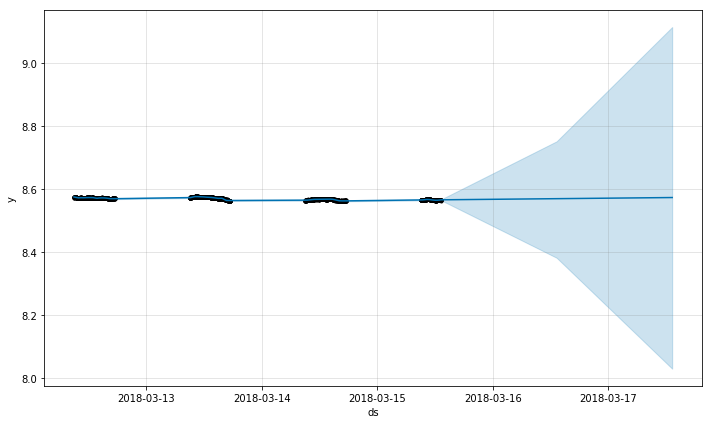

In [229]:
df1 = train_predict
df1['close_c']=df1['closePrice.bid']
df1['y'] =(df1['closePrice.bid'])
df1['y'] = np.log(df1['y'])

df1['ds']=df1['snapshotTime']
model = Prophet()


model.fit(df1);

future = model.make_future_dataframe(periods=2) 
forecast = model.predict(future)
figure=model.plot(forecast)


In [213]:
forecast_filtered = forecast.iloc[:train_predict.shape[0]]
train_predict.reset_index()
forecast_filtered.reset_index()
result = pd.concat([train_predict, forecast_filtered], axis=1, join_axes=[train_predict.index])


In [ ]:
result['closePrice.bid']=np.log(result['closePrice.bid'])

In [214]:
trace1=go.Scatter(x=result.snapshotTime, y=result['closePrice.bid'], name="closePrice", line = dict(color = '#17BECF'), opacity = 0.8)
trace2=go.Scatter(x=result.snapshotTime, y=result['yhat'], name="yhat", line=dict(color='#7F7F7F'), opacity=0.8)
data = [trace1,trace2]
fig2= dict(data=data,layout=layout2)
#pl.offline.plot(fig, filename = "Manually Set Range.html")
pl.offline.plot(fig2, filename = "predict")


/home/seydou/.local/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `predict` didn't end with .html. Adding .html to the end of your file.



'file:///home/seydou/MarathonWeb/CAC40/predict.html'

In [ ]:
"""
df1 = train_data
df1['Low_c']=df1['Low']
df1['y'] = np.log(df1['Low'])
df1['ds']=df1['Date']
model = Prophet()

model.fit(df1);

future = model.make_future_dataframe(periods=365) 
forecast = model.predict(future)
figure=model.plot(forecast)
"""

# Utilisation des réseau de neurone artificiel 

In [230]:
import numpy as np
import pandas as pd
import talib
import random
import pandas_datareader.data as web


In [231]:
random.seed(42)

In [232]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 14 columns):
closePrice.ask      1788 non-null float64
closePrice.bid      1788 non-null float64
highPrice.ask       1788 non-null float64
highPrice.bid       1788 non-null float64
lastTradedVolume    1788 non-null int64
lowPrice.ask        1788 non-null float64
lowPrice.bid        1788 non-null float64
openPrice.ask       1788 non-null float64
openPrice.bid       1788 non-null float64
snapshotTime        1788 non-null object
snapshotTimeUTC     1788 non-null object
close_c             1788 non-null float64
y                   1788 non-null float64
ds                  1788 non-null object
dtypes: float64(10), int64(1), object(3)
memory usage: 195.6+ KB


# Préparation de données

In [233]:
dataset=train_data
dataset
dataset = dataset[['closePrice.bid', 'highPrice.bid', 'lowPrice.bid', 'openPrice.bid']]

In [234]:
dataset['H-L'] = dataset['highPrice.bid'] - dataset['closePrice.bid']
dataset['O-C'] = dataset['closePrice.bid'] - dataset['openPrice.bid']
dataset['3day MA'] = dataset['closePrice.bid'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['closePrice.bid'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['closePrice.bid'].shift(1).rolling(window = 30).mean()
dataset['Std_dev']= dataset['closePrice.bid'].rolling(5).std()
dataset['RSI'] = talib.RSI(dataset['closePrice.bid'].values, timeperiod = 9)
dataset['Williams %R'] = talib.WILLR(dataset['highPrice.bid'].values, dataset['closePrice.bid'].values, dataset['closePrice.bid'].values, 7)


/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [235]:
dataset['Price_Rise'] = np.where(dataset['closePrice.bid'].shift(-1) > dataset['closePrice.bid'], 1, 0)

In [236]:
dataset = dataset.dropna()

In [237]:
X = dataset.iloc[:, 4:-1]
y = dataset.iloc[:, -1]

# Splitting the dataset

In [238]:
split = int(len(dataset)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [239]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [240]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf


In [241]:
classifier = Sequential()

In [242]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))

In [243]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))

In [244]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [245]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [246]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
2020/2020 [==============================] - 3s 2ms/step - loss: 0.2479 - acc: 0.5535
Epoch 2/100
2020/2020 [==============================] - 1s 549us/step - loss: 0.2470 - acc: 0.5545
Epoch 3/100
2020/2020 [==============================] - 1s 554us/step - loss: 0.2464 - acc: 0.5559
Epoch 4/100
2020/2020 [==============================] - 1s 549us/step - loss: 0.2462 - acc: 0.5564
Epoch 5/100
2020/2020 [==============================] - 1s 533us/step - loss: 0.2458 - acc: 0.5609
Epoch 6/100
2020/2020 [==============================] - 1s 546us/step - loss: 0.2455 - acc: 0.5663
Epoch 7/100
2020/2020 [==============================] - 1s 562us/step - loss: 0.2451 - acc: 0.5594
Epoch 8/100
2020/2020 [==============================] - 1s 552us/step - loss: 0.2448 - acc: 0.5614
Epoch 9/100
2020/2020 [==============================] - 1s 561us/step - loss: 0.2451 - acc: 0.5550
Epoch 10/100
2020/2020 [==============================] - 1s 559us/step - loss: 0.2437 - acc: 0.5708
E

2020/2020 [==============================] - 1s 493us/step - loss: 0.1811 - acc: 0.7366
Epoch 83/100
2020/2020 [==============================] - 1s 501us/step - loss: 0.1804 - acc: 0.7347
Epoch 84/100
2020/2020 [==============================] - 1s 486us/step - loss: 0.1793 - acc: 0.7406
Epoch 85/100
2020/2020 [==============================] - 1s 488us/step - loss: 0.1796 - acc: 0.7436
Epoch 86/100
2020/2020 [==============================] - 1s 491us/step - loss: 0.1784 - acc: 0.7460
Epoch 87/100
2020/2020 [==============================] - 1s 495us/step - loss: 0.1768 - acc: 0.7342
Epoch 88/100
2020/2020 [==============================] - 1s 487us/step - loss: 0.1767 - acc: 0.7396
Epoch 89/100
2020/2020 [==============================] - 1s 497us/step - loss: 0.1747 - acc: 0.7475
Epoch 90/100
2020/2020 [==============================] - 1s 485us/step - loss: 0.1714 - acc: 0.7554
Epoch 91/100
2020/2020 [==============================] - 1s 490us/step - loss: 0.1712 - acc: 0.7658
Epo

In [247]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [248]:
dataset['y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(y_pred)):,-1:] = y_pred
trade_dataset = dataset.dropna()

In [249]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['closePrice.bid']/trade_dataset['closePrice.bid'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [250]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [251]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [252]:
trade_dataset.head()


closePrice.bid  highPrice.bid  lowPrice.bid  openPrice.bid  H-L  O-C  \
2050          5264.5         5264.8        5264.3         5264.5  0.3  0.0   
2051          5263.0         5264.8        5263.0         5264.3  1.8 -1.3   
2052          5261.5         5263.0        5261.3         5262.8  1.5 -1.3   
2053          5262.0         5262.3        5259.3         5261.3  0.3  0.7   
2054          5262.8         5263.3        5261.8         5261.8  0.5  1.0   

          3day MA  10day MA     30day MA   Std_dev        RSI  Williams %R  \
2050  5264.966667   5267.10  5269.280000  0.867756  39.682189   -30.666667   
2051  5264.533333   5266.32  5269.020000  1.008464  35.634884  -100.000000   
2052  5263.933333   5265.29  5268.726667  1.370036  31.966930  -100.000000   
2053  5263.000000   5264.21  5268.433333  1.339029  34.495365   -90.566038   
2054  5262.166667   5263.48  5268.150000  1.145862  38.602641   -67.500000   

      Price_Rise y_pred  Tomorrows Returns  Strategy Returns  \
2050           0   True          -0.000285         -0.000285   
2051           0  False          -0.000285          0.000285   
2052           1  False           0.000095         -0.000095   
2053           1   True           0.000152          0.000152   
2054           1  False           0.000380         -0.000380   

      Cumulative Market Returns  Cumulative Strategy Returns  
2050                  -0.000285                -2.849679e-04  
2051                  -0.000570                 8.122988e-08  
2052                  -0.000475                -9.494419e-05  
2053                  -0.000323                 5.707770e-05  
2054                   0.000057                -3.228759e-04

In [255]:
trace1=go.Scatter(x=trade_dataset.index, y=trade_dataset['Cumulative Market Returns'], name="Market Returns", line = dict(color = '#17BECF'), opacity = 0.8)
trace2=go.Scatter(x=trade_dataset.index, y=trade_dataset['Cumulative Strategy Returns'], name="Strategy Returns", line=dict(color='#7F7F7F'), opacity=0.8)

data=[trace1,trace2]
layout2 = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='snapshotTime'
    )
)


fig2= dict(data=data,layout=layout2)
#pl.offline.plot(fig, filename = "Manually Set Range.html")
pl.offline.plot(fig2, filename = "update_button'")


/home/seydou/.local/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `update_button'` didn't end with .html. Adding .html to the end of your file.



"file:///home/seydou/MarathonWeb/CAC40/update_button'.html"